In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import tweepy
import json
import re
import os
import sys

### Data Gathering, Part 1: Twitter archive

In [2]:
df1 = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df1.shape

(2356, 17)

In [4]:
# Let's check how many unique tweet ID's are included in this data set.
df1['tweet_id'].nunique()

2349

In [5]:
df1.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [6]:
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,8.924210e+17,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,8.921770e+17,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,8.918150e+17,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,8.916900e+17,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,8.913280e+17,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null float64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(5), int64(2), 

In [8]:
print(df1.doggo.unique())
print(df1.floofer.unique())

['None' 'doggo']
['None' 'floofer']


In [9]:
print(df1.doggo.value_counts())
print(df1.floofer.value_counts())
print(df1.pupper.value_counts())
print(df1.puppo.value_counts())

None     2259
doggo      97
Name: doggo, dtype: int64
None       2346
floofer      10
Name: floofer, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64


In [10]:
df1.duplicated().sum()

0

In [11]:
# The 'text' column appears to the be the only column with no duplicates.
df1['text'].duplicated().sum()

0

### Data Gathering, Part 2: Image Predictions archive

In [12]:
# Import of image predictions file.
predicted_breeds_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(predicted_breeds_url)
with open('image_predictions.tsv', 'wb') as f:
    f.write(response.content)

In [13]:
df2 = pd.read_csv('image_predictions.tsv', sep='\t')

#### The following items are explanations of the image predictions as provided by Udacity:

- tweet_id is the last part of the tweet URL after "status/" →   https://twitter.com/dog_rates/status/889531135344209921


- p1 is the algorithm's #1 prediction for the image in the tweet → golden retriever


- p1_conf is how confident the algorithm is in its #1 prediction → 95%


- p1_dog is whether or not the #1 prediction is a breed of dog → TRUE


- p2 is the algorithm's second most likely prediction → Labrador retriever


- p2_conf is how confident the algorithm is in its #2 prediction → 1%


- p2_dog is whether or not the #2 prediction is a breed of dog → TRUE

In [14]:
df2.shape

(2075, 12)

In [15]:
print(df2.p1_dog.value_counts())
print(df2.p2_dog.value_counts())
print(df2.p3_dog.value_counts())

True     1532
False     543
Name: p1_dog, dtype: int64
True     1553
False     522
Name: p2_dog, dtype: int64
True     1499
False     576
Name: p3_dog, dtype: int64


In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
# I would like to look at what particular dog breeds appear multiple times.  This may be useful in our analysis.
print(df2.p1.value_counts()[0:5])
print(df2.p2.value_counts()[0:5])
print(df2.p3.value_counts()[0:5])

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
Name: p1, dtype: int64
Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
Name: p2, dtype: int64
Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
Name: p3, dtype: int64


In [18]:
# Note that all tweet_id's in this DataFrame are unique.
df2.tweet_id.nunique()

2075

In [19]:
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Data Gathering, Part 3: Retweets and Likes via Twitter API

In [19]:
import tweepy
consumer_key = 'yIAEcJfJ7uPrQKnI0zD8e6nMP'
consumer_secret = '9oVI1iwvHuVWhaejSIAurNzN5MXPr4L7nphuKjm1B2eEOngNwp'
access_token = '3220892162-QGX3QS3oRxQufzvDupEcz7EvfA2LnoQCgDchZDj'
access_secret = 'DrZ05DvXJ9GpEgLvfekloraCqBC80zFXghMpUiTfnoazG'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

The following StackOverflow link was helpful for obtaining likes and retweets:

https://stackoverflow.com/questions/45761253/how-do-i-ge-tthe-number-of-likes-on-a-tweet-via-tweepy

In [10]:
# samples:
tweet0 = api.get_status(df2['tweet_id'][0])
tweet1 = api.get_status(df2['tweet_id'][1])
print(tweet0.retweet_count, tweet0.favorite_count, '\n')
print(tweet1.retweet_count, tweet1.favorite_count, '\n')

499 2532 

47 125 



The following sections of code pull the counts of retweets and favorites for the Tweet ID's in our Image Predictions file.  I found it necessary to write multiple iterations of the same code in order to pull the data little by little and avoid a rate limit error from the Twitter API.

In [11]:
retweet_list1 = []
for i in df2['tweet_id'][0:300]:
    try:
        tweet_info = api.get_status(i)
        retweet_list1.append(tweet_info.retweet_count)
    except:
        retweet_list1.append(0)

In [13]:
retweet_list2 = []
for i in df2['tweet_id'][300:600]:
    try:
        tweet_info = api.get_status(i)
        retweet_list2.append(tweet_info.retweet_count)
    except:
        retweet_list2.append(0)

In [22]:
retweet_list3 = []
for i in df2['tweet_id'][600:900]:
    try:
        tweet_info = api.get_status(i)
        retweet_list3.append(tweet_info.retweet_count)
    except:
        retweet_list3.append(0)

In [28]:
retweet_list4 = []
for i in df2['tweet_id'][900:1200]:
    try:
        tweet_info = api.get_status(i)
        retweet_list4.append(tweet_info.retweet_count)
    except:
        retweet_list4.append(0)

In [33]:
retweet_list5 = []
for i in df2['tweet_id'][1200:1500]:
    try:
        tweet_info = api.get_status(i)
        retweet_list5.append(tweet_info.retweet_count)
    except:
        retweet_list5.append(0)

In [39]:
retweet_list6 = []
for i in df2['tweet_id'][1500:1800]:
    try:
        tweet_info = api.get_status(i)
        retweet_list6.append(tweet_info.retweet_count)
    except:
        retweet_list6.append(0)

In [50]:
retweet_list7 = []
for i in df2['tweet_id'][1800:]:
    try:
        tweet_info = api.get_status(i)
        retweet_list7.append(tweet_info.retweet_count)
    except:
        retweet_list7.append(0)

In [61]:
retweet_complete = retweet_list1 + retweet_list2 + retweet_list3 + retweet_list4 + retweet_list5 + retweet_list6 + \
    retweet_list7
# pd.to_excel('')

In [59]:
# this list is created as a separate section of code in order to avoid exceeding the rate limtit
favorite_list1 = []
for i in df2['tweet_id'][0:300]:
    try:
        tweet_info = api.get_status(i)
        favorite_list1.append(tweet_info.favorite_count)
    except:
        favorite_list1.append(0)

In [64]:
favorite_list2 = []
for i in df2['tweet_id'][300:600]:
    try:
        tweet_info = api.get_status(i)
        favorite_list2.append(tweet_info.favorite_count)
    except:
        favorite_list2.append(0)

In [68]:
favorite_list3 = []
for i in df2['tweet_id'][600:900]:
    try:
        tweet_info = api.get_status(i)
        favorite_list3.append(tweet_info.favorite_count)
    except:
        favorite_list3.append(0)

In [70]:
favorite_list4 = []
for i in df2['tweet_id'][900:1200]:
    try:
        tweet_info = api.get_status(i)
        favorite_list4.append(tweet_info.favorite_count)
    except:
        favorite_list4.append(0)

In [103]:
favorite_list5 = []
for i in df2['tweet_id'][1200:1500]:
    try:
        tweet_info = api.get_status(i)
        favorite_list5.append(tweet_info.favorite_count)
    except:
        favorite_list5.append(0)

In [95]:
favorite_list6 = []
for i in df2['tweet_id'][1500:1800]:
    try:
        tweet_info = api.get_status(i)
        favorite_list6.append(tweet_info.favorite_count)
    except:
        favorite_list6.append(0)

In [109]:
favorite_list7 = []
for i in df2['tweet_id'][1800:]:
    try:
        tweet_info = api.get_status(i)
        favorite_list7.append(tweet_info.favorite_count)
    except:
        favorite_list7.append(0)

In [111]:
favorites_complete = favorite_list1 + favorite_list2 + favorite_list3 + favorite_list4 + favorite_list5 + \
    favorite_list6 + favorite_list7

In [134]:
df3 = pd.DataFrame({'tweet_id': df2['tweet_id'], 'retweet_count': retweet_complete, 'favorite_count': favorites_complete})

In [135]:
df3.shape

(2075, 3)

In [65]:
df3.tail()

,tweet_id,retweet_count,favorite_count
2070,891327558926688256,9130,39484
2071,891689557279858688,8428,41290
2072,891815181378084864,4054,24537
2073,892177421306343424,6122,32588
2074,892420643555336192,8289,37949


Note that the retweet and favorite data will be stored in an Excel sheet so that the code above does not need to be rerun each time this Jupyter Notebook is closed and reopened.

In [137]:
df3.to_excel('retweet_output.xlsx', index=False)

In [20]:
df3 = pd.read_excel('retweet_output.xlsx')

### Data Cleaning

In [21]:
df1_clean = df1.copy()
df2_clean = df2.copy()
df3_clean = df3.copy()

Cleaning step 1: Convert tweet_id in all three DataFrames to a string

In [22]:
df1_clean['tweet_id'] = df1_clean['tweet_id'].astype(str)
df2_clean['tweet_id'] = df2_clean['tweet_id'].astype(str)
df3_clean['tweet_id'] = df3_clean['tweet_id'].astype(str)

Cleaning step 2: Convert 'retweeted' columns in df1 to a strings

In [23]:
df1_clean['retweeted_status_id'] = df1_clean['retweeted_status_id'].astype(str)
df1_clean['retweeted_status_user_id'] = df1_clean['retweeted_status_user_id'].astype(str)

Cleaning step 3: Convert timestamps from a string to a time format

In [24]:
df1_clean['timestamp'] = pd.to_datetime(df1_clean['timestamp'])
df1_clean['retweeted_status_timestamp'] = pd.to_datetime(df1_clean['retweeted_status_timestamp'])

Cleaning step 4: Convert image number from an integer to a string

In [25]:
df2_clean['img_num'] = df2_clean['img_num'].astype(str)

Cleaning step 5: Update some of the names in the 'name' column

In [26]:
df1_clean['name'].replace(['a', 'an', 'such', 'the', 'quite'], 'None', inplace=True)

Cleaning step 6: Split the weblink section of the 'text' column into its own separate column.  This will be helpful if we search for terms or do any other specific work on the 'text' column.

In [27]:
df1_clean['tweet_link'] = df1_clean['text'].str.extract(r'(https://t.co/\w*)')

In [28]:
df4 = df1_clean.text.str.partition(' https://')

In [29]:
df4.shape

(2356, 3)

In [30]:
df4.rename(columns={0: 'text_section'}, inplace=True)
df4.drop([1, 2], axis=1, inplace=True)

In [31]:
# Let's add this 'text_section' column to df1.
df1_new = pd.concat([df1_clean, df4], axis=1)
df1_new.drop('text', axis=1, inplace=True)

Cleaning Step 7: Set the rating numerators to a certain minimum and maximum.  After reviewing a number of entries in the 'text' column it appears that the minimum can remain at zero, but the maximum should be set to 15.

In [32]:
print(min(df1_new['rating_numerator']))
print(max(df1_new['rating_numerator']))

0
1776


In [33]:
rating_num = df1_new['rating_numerator'].tolist()

In [34]:
rating_numerator_updated = [min(x, 15) for x in rating_num]

In [35]:
df1_new['rating_numerator_clean'] = rating_numerator_updated
df1_new.drop(['rating_numerator'], axis=1, inplace=True)

Cleaning Step 8: Set the rating denominators to 10.

In [36]:
df1_new.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [37]:
rating_denom = df1_new['rating_denominator'].tolist()

In [38]:
df1_new['rating_denominator_clean'] = df1_new['rating_denominator'].where(df1_new['rating_denominator'] == 10, 10)

In [39]:
df1_new.rating_denominator_clean.value_counts()

10    2356
Name: rating_denominator_clean, dtype: int64

In [40]:
df1_new.drop('rating_denominator', axis=1, inplace=True)

Cleaning Step 9: Obtain correct tweet_id's.  The tweet_id's in the 'tweet_id' column of the twitter-archive-enhanced are incomplete.  In order to join or merge our data frames on the tweet_id column we will need to have consistency in this column.

In [41]:
df1_new['tweet_id'] = df1_new['expanded_urls'].str.extract(r'(\d{18})')

Cleaning Step 10: Let's see if we can make some updates to the 'name' column since there are a number of cases where the dog's name can be found in the 'text' column but not the name column.  At the very least I would like to see if the dog is named or not since that will be useful in our analysis later.

In [42]:
name_in_text = []

for text in range(df1_new.shape[0]):
    try:
        # what are we searching for?
        word1 = re.compile(r'name(.*)')
        # where are we searching?
        mo1 = word1.search(df1_new.text_section[text])
        name1 = mo1.group()
        name_in_text.append(name1)
    except:
        name_in_text.append('')

In [43]:
df1_new['name2'] = name_in_text

In [44]:
has_name = []

for i in range(df1_new.shape[0]):
    if (df1_new['name'][i] == 'None') & (df1_new['name2'][i] == ''):
        has_name.append('No')
    else:
        has_name.append('Yes')

In [45]:
df1_new['dog_has_name'] = has_name

In [46]:
df1_new['dog_has_name'].value_counts()

Yes    1571
No      785
Name: dog_has_name, dtype: int64

In [47]:
df1_new.drop('name2', axis=1, inplace=True)

#### Tidiness step 1:
Combine the 'doggo', 'floofer', 'pupper' and 'puppo' columns into a single column.

In [48]:
df1_new['dog_labels'] = df1_new['doggo'] + df1_new['floofer'] + df1_new['pupper'] + df1_new['puppo']

In [50]:
df1_new['dog_labels'].value_counts()

NoneNoneNoneNone        1976
NoneNonepupperNone       245
doggoNoneNoneNone         83
NoneNoneNonepuppo         29
doggoNonepupperNone       12
NoneflooferNoneNone        9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: dog_labels, dtype: int64

In [51]:
df1_new['dog_labels'] = df1_new.dog_labels.str.split('None')

In [52]:
df1_new['dog_labels'] = df1_new.dog_labels.apply(','.join)

The following Stackoverflow article was helpful:
https://stackoverflow.com/questions/37347725/converting-a-panda-df-list-into-a-string

In [53]:
df1_new['dog_labels'] = df1_new.dog_labels.str.strip(',')

In [54]:
df1_new['dog_labels'] = np.where(df1_new['dog_labels'] == 'doggo,,puppo', 'doggo and puppo', df1_new['dog_labels'])
df1_new['dog_labels'] = np.where(df1_new['dog_labels'] == 'doggo,pupper', 'doggo and pupper', df1_new['dog_labels'])
df1_new['dog_labels'] = np.where(df1_new['dog_labels'] == 'doggofloofer', 'doggo and floofer', df1_new['dog_labels'])

In [55]:
# verification step
df1_new.dog_labels.value_counts()

                     1976
pupper                245
doggo                  83
puppo                  29
doggo and pupper       12
floofer                 9
doggo and puppo         1
doggo and floofer       1
Name: dog_labels, dtype: int64

In [56]:
df1_new.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Tidiness step 2:
Combine 3 DataFrames into 1

In [57]:
print(df1_new.shape)
print(df2_clean.shape)
print(df3_clean.shape)

(2356, 16)
(2075, 12)
(2075, 3)


In [58]:
df2_clean.sort_values('tweet_id', inplace=True)

In [59]:
df3_clean.rename(columns={'tweet_id': 'tweet_id2'}, inplace=True)

In [60]:
df3_clean.sort_values('tweet_id2', inplace=True)

In [61]:
df5 = pd.concat([df2_clean, df3_clean], axis=1)

In [62]:
# Check to make sure that the first fifteen digits of the tweet_id are equal in all rows.
id_check = []
for a in range(df2_clean.shape[0]):
    if df5.tweet_id[a][0:15] == df5.tweet_id2[a][0:15]:
        id_check.append('OK')
    else:
        id_check.append('no_match')

In [63]:
df5['tweet_id_check'] = id_check

In [64]:
df5.tweet_id_check.value_counts()

OK    2075
Name: tweet_id_check, dtype: int64

In [65]:
df5.drop('tweet_id_check', axis=1, inplace=True)

In [66]:
df1_new.sort_values('tweet_id', ascending=True, inplace=True)

In [67]:
# Let's do a visual check to see that the first few tweet id's match up before merging the DataFrames.
print(df1_new.tweet_id.head())
print(df5.tweet_id.head())

2355    666020888022790149
2354    666029285002620928
2353    666033412701032449
2352    666044226329800704
2351    666049248165822465
Name: tweet_id, dtype: object
0    666020888022790149
1    666029285002620928
2    666033412701032449
3    666044226329800704
4    666049248165822465
Name: tweet_id, dtype: object


In [68]:
df6 = pd.merge(df1_new, df5, on='tweet_id', how='inner', indicator=True)

In [69]:
df6.shape

(2138, 31)

In [70]:
print(df6.tweet_id.duplicated().sum())

144


#### Note: df6 will be our master dataset for analysis and visualization

In [71]:
df6.to_csv('master_dataset.csv', index=False)

### Data Analysis, Part 1: Relationship between Ratings and Number of Likes (the favorite_count).

In [72]:
# Let's make a scatterplot to view the relationship between a dog's rating and the number of likes it received.
# First we need to remove the 144 duplicate tweets from our dataset.
df6A = df6.drop_duplicates('tweet_id', keep='last')
print(df6A.shape)

(1994, 31)


The following Stack Overflow article was helpful in setting up a trendline: 

https://stackoverflow.com/questions/41635448/how-can-i-draw-scatter-trend-line-on-matplot-python-pandas?noredirect=1

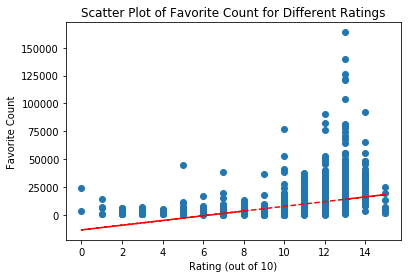

In [73]:
x = df6A.rating_numerator_clean
y = df6A.favorite_count
plt.scatter(x, y)
plt.title('Scatter Plot of Favorite Count for Different Ratings')
plt.xlabel('Rating (out of 10)')
plt.ylabel('Favorite Count')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")

plt.show()

<font color=blue> The scatterplot above indicates that, in general, tweets with a higher dog rating received more likes.

### Data Analysis, Part 2: Named Dogs vs Unnamed Dogs

My impression is that it is easier for viewers to connect with a dog with a name, so we will test to see if they have more likes on average.

As with Part 1 of our data analysis we should use df6A so that duplicates are removed.

Item 10 in the data cleaning section identifies whether or not the dog has a name.

In [74]:
yes_name = df6A.query("dog_has_name == 'Yes'")['rating_numerator_clean'].mean()
no_name = df6A.query("dog_has_name == 'No'")['rating_numerator_clean'].mean()

# next we need the averages so we can take the sum using a groupby and then dividing by the variables above

In [75]:
print(yes_name)
print(no_name)

10.710021321961621
10.270868824531517


<font color=blue>
These two averages are quite close so it is reasonable to conclude that the presence of a name in the text of the tweet does NOT have a meaningful impact on how many favorites a tweet receives.

### Data Analysis, Part 3: A Look at the Use of the Dog Label Terms

For this last analysis section I would like to get a general comparison at how often the terms 'doggo', 'floofer', 'puppo' and 'pupper' are used in the 'text column and how often they are used in the labels columns that was included with the data.

In [76]:
df6A_rows = df6A.shape[0]
doggo_in_text = []
floofer_in_text = []
pupper_in_text = []
puppo_in_text = []
empty_list = []
label_list = []

for text in range(df6A_rows):
    try:
        # what are we searching for?
        word1 = re.compile(r'doggo\s')
        # where are we searching?
        finding1 = word1.findall(df6A.text_section[text])
        label_list.append(finding1)
        word2 = re.compile(r'floofer\s')
        finding2 = word2.findall(df6A.text_section[text])
        label_list.append(finding2)
        word3 = re.compile(r'pupper\s')
        finding3 = word3.findall(df6A.text_section[text])
        label_list.append(finding3)
        word4 = re.compile(r'puppo\s')
        finding4 = word4.findall(df6A.text_section[text])
        label_list.append(finding4)
    except:
        empty_list.append('')

In [77]:
print('doggo:', label_list.count(['doggo ']))
print('floofer:', label_list.count(['floofer ']))
print('pupper:', label_list.count(['pupper ']))
print('puppo:', label_list.count(['puppo ']))

doggo: 40
floofer: 0
pupper: 75
puppo: 5


In [78]:
# Let's compare the figures above to the number of times they appears in the labels column.
df6A['dog_labels'].value_counts()

                     1688
pupper                203
doggo                  63
puppo                  22
doggo and pupper        9
floofer                 7
doggo and puppo         1
doggo and floofer       1
Name: dog_labels, dtype: int64

<font color=blue> Conclusion: These terms appear more often in the dog labels column than they do in the actual text.

### Data Analysis, Part 4: Dog Breeds and Image Predictions

The neural network used to predict the dog breeds often predicted Chihuahua, Labrador retriever, and golden retriever.  Let's compare the accuracy for each of those three breeds on the first two attempts.

In [79]:
print(df6A.query("p1 == 'Chihuahua'")['p1_dog'].value_counts())
print(df6A.query("p1 == 'Labrador_retriever'")['p1_dog'].value_counts())
print(df6A.query("p1 == 'golden_retriever'")['p1_dog'].value_counts())

True    79
Name: p1_dog, dtype: int64
True    95
Name: p1_dog, dtype: int64
True    139
Name: p1_dog, dtype: int64


In [80]:
print(df6A.query("p2 == 'Chihuahua'")['p2_dog'].value_counts())
print(df6A.query("p2 == 'Labrador_retriever'")['p2_dog'].value_counts())
print(df6A.query("p2 == 'golden_retriever'")['p2_dog'].value_counts())

True    43
Name: p2_dog, dtype: int64
True    96
Name: p2_dog, dtype: int64
True    82
Name: p2_dog, dtype: int64


### Data Wrangling Write-up

Data cleaning steps 7 and 8 are imperfect in that they do not take into account some special cases.  For example, one particular tweet shows a rating of 20/16 in the 'text' column.  Perhaps ratings like this could be converted to have a denominator of 10 but that would require code that considers a wide variety of cases.  Another alternative might be to simply elminate certain rows where *both* the numerator and the denominator are outside of a normal range.

Cleaning item number 9 came to mind only after I realized that the 3 DataFrames could not be joined or merged unless there was consisency in the 'tweet_id' column.  It is important to note that the extract method used is good but it did not capture all tweet_ids since there are rows in which the 'expanded_urls' column did not have the tweet_id in it.  This means that certain data was excluded from our master_dataset but it was a relatively limited number of rows that were lost.

For Cleaning item number 10 I ran into certain difficulties in extracting the dog's name from the text column in cases where it was not present in the 'name' column.  Also, I should mention that there three or four cases where the dog's name appears as a noun such as 'not' or 'officially'.  These wer isolated cases so they did not have an impact on Analysis item number 2, which dealt with dog names.

For the data tidiness section I had intended to use the "melt" method but the presence of multiple lables for the same dog in about 15 cases made it difficult to do so.  The methods I used required more code but provided a clearer solution and kept the data complete.

The last item to note is that there were a number of cases where I found it difficult to use vectorization so I opted for a for-loop instead.  I understand that this dataset was relatively small so this was not a problem.  With a larger dataset then vectorization would be preferable.

### Other Conclusions and Observations

There were a number of unique cases within this dataset that were not always easy to account for unless 1) substantial amounts of code were written to account for those unique cases or 2) many manual updates were made to account for specific cases.  This did not, however, have a major impact on the conclusions and observations that were made in the analysis section at the end of this report.  Using 1994 unique tweets was sufficient to give a good idea of some of the averages and trends within the data.

There are some specific items that would require a larger dataset in order provide better credibility.  For example, the data is adequate for some conclusions in Data Analysis item 4 but a dataset would likely allow for a larger number of predictions for each breed of dog and therefore lend better credibility to this analysis.  I found it a little hard to believe that the model accurately predicted the dog breed 100% of the time for Chihuahua, Labrador retriever and golden retriever.  Also, there seemed to be some contradiction; if the dog was accurately predicted to be one breed then how could it be also accurately deemed to be another?  Either the dogs are often a mix of various breeds or this is an area for further investigation and explanation.